In [1]:
# !pip install jupyter_contrib_nbextensions
# !jupyter contrib nbextension install

In [2]:
from IPython.display import display, HTML
display(HTML("<style>div.container { width:100% !important; }</style>"))

파이썬과 OpenCV를 이용한 영상처리 원리와 응용

# 영상처리 개요

## 이미지 표현

<p>Lena</p>
<img src="images/lena.jpg" align="left">

## OpenCV

### OpenCV

In [3]:
import cv2
print(cv2.__version__)

4.6.0


### 이미지 불러오기

In [4]:
lena_img = cv2.imread("images/lena.jpg")
print(lena_img.shape)

(512, 512, 3)


In [5]:
type(lena_img)

numpy.ndarray

In [6]:
lena_gray = cv2.imread("images/lena.jpg", cv2.IMREAD_GRAYSCALE)
print(lena_gray.shape)

(512, 512)


### 이미지 출력하기

In [7]:
cv2.imshow("Lena", lena_img)
cv2.waitKey()
cv2.destroyAllWindows()

In [8]:
import cv2

fname = 'images/lena.jpg'

color = cv2.imread(fname, cv2.IMREAD_COLOR)
grayscale = cv2.imread(fname, cv2.IMREAD_GRAYSCALE)
unchanged = cv2.imread(fname, cv2.IMREAD_UNCHANGED)

cv2.imshow('Color', color)
cv2.imshow('Grayscale', grayscale)
cv2.imshow('Unchanged', unchanged)

cv2.waitKey(0)
cv2.destroyAllWindows()

### 이미지 저장하기

In [9]:
import cv2

img = cv2.imread('images/lena.jpg', cv2.IMREAD_GRAYSCALE)
cv2.imwrite('lenagray.png',img)

True

### matplotlib으로 그리기

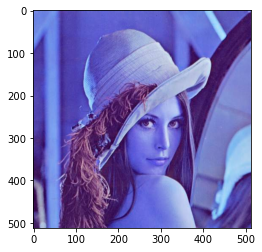

In [10]:
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

img = cv2.imread('images/lena.jpg', cv2.IMREAD_COLOR)

plt.imshow(img)
plt.show()

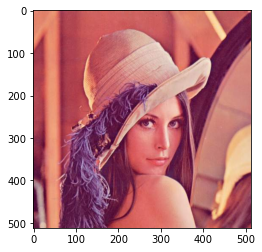

In [11]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('images/lena.jpg', cv2.IMREAD_COLOR)

b, g, r = cv2.split(img)
img2 = cv2.merge([r, g, b])

plt.imshow(img2)
plt.show()

## 디지털 화상과 컬러

### 컬러 공간 변환

In [12]:
flags = [flag for flag in dir(cv2) if flag.startswith('COLOR_')]
print(flags)

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_BGGR2BGR', 'COLOR_BAYER_BGGR2BGRA', 'COLOR_BAYER_BGGR2BGR_EA', 'COLOR_BAYER_BGGR2BGR_VNG', 'COLOR_BAYER_BGGR2GRAY', 'COLOR_BAYER_BGGR2RGB', 'COLOR_BAYER_BGGR2RGBA', 'COLOR_BAYER_BGGR2RGB_EA', 'COLOR_BAYER_BGGR2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GBRG2BGR', 'COLOR_BAYER_GBRG2BGRA', 'COLOR_BAYER_GBRG2BGR_EA', 'COLOR_BAYER_GBRG2BGR_VNG', 'COLOR_BAYER_GBRG2GRAY', 'COLOR_BAYER_GBRG2RGB', 'COLOR_BAYER_GBRG2RGBA', 'COLOR_BAYER_GBRG2RGB_EA', 'COLOR_BAYER_GBRG2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_

In [13]:
lena_img = cv2.imread("images/lena.jpg")
B, G, R = lena_img[0][0]
print("컬러 화소", lena_img[0][0])
print("YPrPb", 0.114*B + 0.587*G + 0.299*R)
print("YCrCb", 0.0722*B + 0.7152*G + 0.2116*R)
lena_gray = cv2.imread("images/lena.jpg", cv2.IMREAD_GRAYSCALE)
print("그레이스케일 화소", lena_gray[0][0])

컬러 화소 [127 136 226]
YPrPb 161.884
YCrCb 154.2582
그레이스케일 화소 162


## 동영상 처리하기

### 동영상 읽기

In [14]:
import cv2

cap = cv2.VideoCapture("images/Puppies-HD.mp4")

if cap.isOpened():
    print(cap.get(cv2.CAP_PROP_FPS))
    delay = int(1000 / cap.get(cv2.CAP_PROP_FPS))
    while True:
        ret, img = cap.read()
        if ret:
            cv2.imshow("Movie", img)
            if cv2.waitKey(delay) & 0xFF == 27 : # ESC키
                print("ESC Key pressed")
                break
        else:
            print("No Frame")
            print(ret, img)
            break
        
else:
    print("File not opened")

cap.release()
cv2.destroyAllWindows()

29.97002997002997
ESC Key pressed


### 카메라 영상 읽기

In [15]:
import cv2

cap = cv2.VideoCapture(1)

if cap.isOpened():
    print(cap.get(cv2.CAP_PROP_FPS))
    delay = int(1000 / cap.get(cv2.CAP_PROP_FPS))
    while True:
        ret, img = cap.read()
        if ret:
            # 영상처리 코드
            cv2.imshow("Movie", cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
            if cv2.waitKey(delay) & 0xFF == 27 : # ESC키
                print("ESC Key pressed")
                break
        else:
            print("No Frame")
            print(ret, img)
            break
        
else:
    print("File not opened")

cap.release()
cv2.destroyAllWindows()

File not opened


### 동영상 속성

In [16]:
import cv2

cap = cv2.VideoCapture(1)
print(cap.get(cv2.CAP_PROP_FRAME_WIDTH), cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 320)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 240)
print(cap.get(cv2.CAP_PROP_FRAME_WIDTH), cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

if cap.isOpened():
    print(cap.get(cv2.CAP_PROP_FPS))
    delay = int(1000 / cap.get(cv2.CAP_PROP_FPS))
    while True:
        ret, img = cap.read()
        if ret:
            cv2.imshow("Movie", img)
            if cv2.waitKey(delay) & 0xFF == 27 : # ESC키
                print("ESC Key pressed")
                break
        else:
            print("No Frame")
            print(ret, img)
            break
        
else:
    print("File not opened")

cap.release()
cv2.destroyAllWindows()

0.0 0.0
0.0 0.0
File not opened


### 동영상 프레임 저장하기

In [17]:
import cv2
import numpy as np
from datetime import datetime

def mouseHandler(event, x, y, flags, param):
    if event==cv2.EVENT_LBUTTONDOWN:
        print(event, x, y)
        print(datetime.today())
        filename=str(datetime.today().microsecond)+".jpg"
        cv2.imwrite(filename, img)

cv2.namedWindow('Movie')
cv2.setMouseCallback("Movie", mouseHandler)

cap = cv2.VideoCapture("images/Puppies-HD.mp4")

img = None
if cap.isOpened():

    print(cap.get(cv2.CAP_PROP_FPS))
    delay = int(1000 / cap.get(cv2.CAP_PROP_FPS))
    while True:
        ret, img = cap.read()
        if ret:
            cv2.imshow("Movie", img)
            if cv2.waitKey(delay) & 0xFF == 27 : # ESC키
                print("ESC Key pressed")
                break
        else:
            print("No Frame")
            print(ret, img)
            break
        
else:
    print("File not opened")

cap.release()
cv2.destroyAllWindows()

29.97002997002997
ESC Key pressed


### 비디오 저장하기

In [18]:
import cv2

cap = cv2.VideoCapture("images/Puppies-HD.mp4")

if cap.isOpened():
    fourcc = cv2.VideoWriter_fourcc(*'DIVX') # DIVX, XVID, FMP4, X264, MJPG
    width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
    height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
    size = (int(width), int(height))
    fps = cap.get(cv2.CAP_PROP_FPS)
    out = cv2.VideoWriter("video.avi", fourcc, fps, size)

    delay = int(1000/cap.get(cv2.CAP_PROP_FPS))
    print(width, height, size, fps, delay)

    while True:
        ret, img = cap.read()
        if ret:
            gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
            cv2.imshow("Movie", gray)
            out.write(cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR))
            if cv2.waitKey(delay) & 0xFF == 27:
                print("윈도우 종료")
                break
        else:
            print(ret, img)
            break
else:
    print("비디오 안열림")

out.release()
cap.release()
cv2.destroyAllWindows()

1280.0 720.0 (1280, 720) 29.97002997002997 33
윈도우 종료


## 이벤트 처리하기


### 마우스 이벤트

In [19]:
import cv2
import numpy as np

def draw_circle(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        if flags & cv2.EVENT_FLAG_CTRLKEY:
            cv2.rectangle(img, (x,y), (x+20, y+20), (0,0,255), -1)
        else:
            cv2.rectangle(img, (x,y), (x+20, y+20), (0,255,0), 2)
    elif event == cv2.EVENT_RBUTTONDOWN:
        cv2.circle(img, (x,y), 10, (255,0,0), 2)
    elif event == cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(img, (x,y), 20, (255,0,0), -1)
        
img = np.full((512,512,3), 255, dtype=np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while(1):
    cv2.imshow('image',img)
    if cv2.waitKey(20) & 0xFF == 27:
        break

cv2.destroyAllWindows()

### 키보드 이벤트

In [20]:
import cv2
import numpy as np
image = np.full((100, 100, 3), 255, np.uint8)

while(1):
    cv2.imshow("Key test", image)
    key = cv2.waitKey(0)
    print(f'Code: {key}, Char: {chr(key)}')
    if key & 0xFF == 27:
        break

cv2.destroyAllWindows()

Code: 27, Char: 


### 트랙 바 이용하기

In [21]:
import cv2
import numpy as np

def nothing(x):
    pass

img = np.zeros((200,500,3), np.uint8)
cv2.namedWindow('image')

cv2.createTrackbar('Red', 'image', 0, 255, nothing)
cv2.createTrackbar('Green', 'image', 0, 255, nothing)
cv2.createTrackbar('Blue', 'image', 0, 255, nothing)
cv2.createTrackbar('0 or 1', 'image', 0, 1, nothing)

while(1):
    cv2.imshow('image', img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break 

    r = cv2.getTrackbarPos('Red', 'image')
    g = cv2.getTrackbarPos('Green', 'image')
    b = cv2.getTrackbarPos('Blue', 'image')
    s = cv2.getTrackbarPos('0 or 1', 'image')

    if s == 0:
        img[:] = 0
    else:
        img[:] = [b,g,r]

cv2.destroyAllWindows()

In [22]:
import cv2
import numpy as np

img = np.zeros((200,500,3), np.uint8)
cv2.namedWindow('image')

def set_background(x):
    global img
    r = cv2.getTrackbarPos('Red', 'image')
    g = cv2.getTrackbarPos('Green', 'image')
    b = cv2.getTrackbarPos('Blue', 'image')
    s = cv2.getTrackbarPos('0 or 1', 'image')

    if s == 0:
        img[:] = 0
    else:
        img[:] = [b,g,r]

        
cv2.createTrackbar('Red', 'image', 0, 255, set_background)
cv2.createTrackbar('Green', 'image', 0, 255, set_background)
cv2.createTrackbar('Blue', 'image', 0, 255, set_background)
cv2.createTrackbar('0 or 1', 'image', 0, 1, set_background)

while(1):
    cv2.imshow('image', img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break 


cv2.destroyAllWindows()

## 도형 그리기

### 선 그리기

In [23]:
import cv2
import numpy as np

img = np.full((250, 250, 3), 255, dtype=np.uint8)

cv2.line(img, (50, 10), (200, 10), (255, 0, 0), 1)
cv2.line(img, (50, 60), (200, 60), (0, 255, 0), 2)
cv2.line(img, (50, 110), (200, 110), (0, 0, 255), 3)
cv2.line(img, (50, 160), (200, 160), (0, 0, 0), 4)
cv2.line(img, (50, 210), (200, 210), (255, 0, 255), 5)

cv2.imshow('Lines',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 사각형 그리기

In [24]:
import cv2
import numpy as np

img = np.full((250, 250, 3), 255, dtype=np.uint8)

cv2.rectangle(img, (50, 10), (200, 50), (255, 0, 0))
cv2.rectangle(img, (50, 60), (200, 100), (255, 0, 0), 5)
cv2.rectangle(img, (50, 110), (200, 150), (255, 0, 0), -1)
cv2.rectangle(img, (50, 160), (200, 200), (255, 0, 0), -1)
cv2.rectangle(img, (50, 160), (200, 200), (0, 0, 255), 5)

cv2.imshow('Rectangle',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 원 그리기

In [25]:
import cv2
import numpy as np

img = np.full((250, 250, 3), 255, dtype=np.uint8)

cv2.circle(img, (50, 50), 50, (255, 0, 0))
cv2.circle(img, (100, 100), 50, (0, 255, 0), -1)
cv2.circle(img, (100, 100), 100, (0, 0, 255), 5)
cv2.circle(img, (200, 200), 50, (0, 0, 0), 5)

cv2.imshow('Circle',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 호와 타원 그리기

In [26]:
import cv2
import numpy as np

img = np.full((250, 250, 3), 255, dtype=np.uint8)

cv2.ellipse(img, (60, 60), (50, 30), -30, 0, 360, (255, 0, 0), 2)
cv2.ellipse(img, (160, 60), (50, 30), 0, 0, 360, (0, 0, 255), -1)
cv2.ellipse(img, (60, 160), (50, 30), 30, 0, 180, (255, 0, 0), 2)
cv2.ellipse(img, (160, 160), (50, 30), 90, 0, 180, (0, 0, 255), -1)
cv2.ellipse(img, (160, 160), (50, 30), 90, 180, 360, (255, 0, 0), -1)

cv2.imshow('Ellipse',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 다각형 그리기

In [27]:
import cv2
import numpy as np

img = np.full((250, 250, 3), 255, dtype=np.uint8)
points = np.array([[[60,60], [100,10], [200,60], [150,100], [100, 100]]], dtype=np.int32)

cv2.polylines(img, points, True, (255, 0, 0), 5)
cv2.polylines(img, points+[0,100], False, (0, 0, 255), 10)

cv2.imshow('Polylines',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [28]:
points

array([[[ 60,  60],
        [100,  10],
        [200,  60],
        [150, 100],
        [100, 100]]])

### 문자열 표시하기

In [29]:
import cv2
import numpy as np

img = np.full((250, 250, 3), 255, dtype=np.uint8)

cv2.putText(img, "Hello Python", (10,50), cv2.FONT_ITALIC, 1, (255,0,0))
cv2.putText(img, "Hello Python", (10,80), cv2.FONT_ITALIC, 0.5, (0,0,255))
cv2.putText(img, "Hello Python", (10,150), cv2.FONT_HERSHEY_DUPLEX, 2, (0,0,0))
cv2.putText(img, "Hello Python", (10,200), cv2.FONT_HERSHEY_TRIPLEX, 1, (0,0,0))

cv2.imshow('Text',img)
cv2.waitKey(0)
cv2.destroyAllWindows()